# Face Recognition

In [24]:
import numpy as np
import pandas as pd

#Classifier for training the data.
from sklearn.neighbors import KNeighborsClassifier

#for getting the data from the file path
import os
import cv2
from PIL import Image

#for the confusion matrix
from sklearn import metrics

#useful for plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Starting with reading and understanding the data.

In [2]:
No_classes = 40

In [3]:
D = []
y = []
for i in range (1,No_classes + 1):
    for j in range (1,11):
        img = cv2.imread(os.path.join("D:\Records\Term 8\Pattern Recognittion\Projects\s"+str(i),str(j)+".pgm"))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
        img = cv2.resize(img, (92,112), interpolation = cv2.INTER_AREA) # resize to 92x112
        img = img.flatten() #Flattining the image to (10304,)
        if img is not None:
            D.append(img)
        y.append(i)
print("No. images: " + str(len(D)))
print("No. labels: " + str(len(y)))

No. images: 400
No. labels: 400


In [4]:
D = np.array(D)

In [5]:
#Matrix D shapes.
D.shape

(400, 10304)

In [6]:
y = np.array(y)

### Plotting the images.

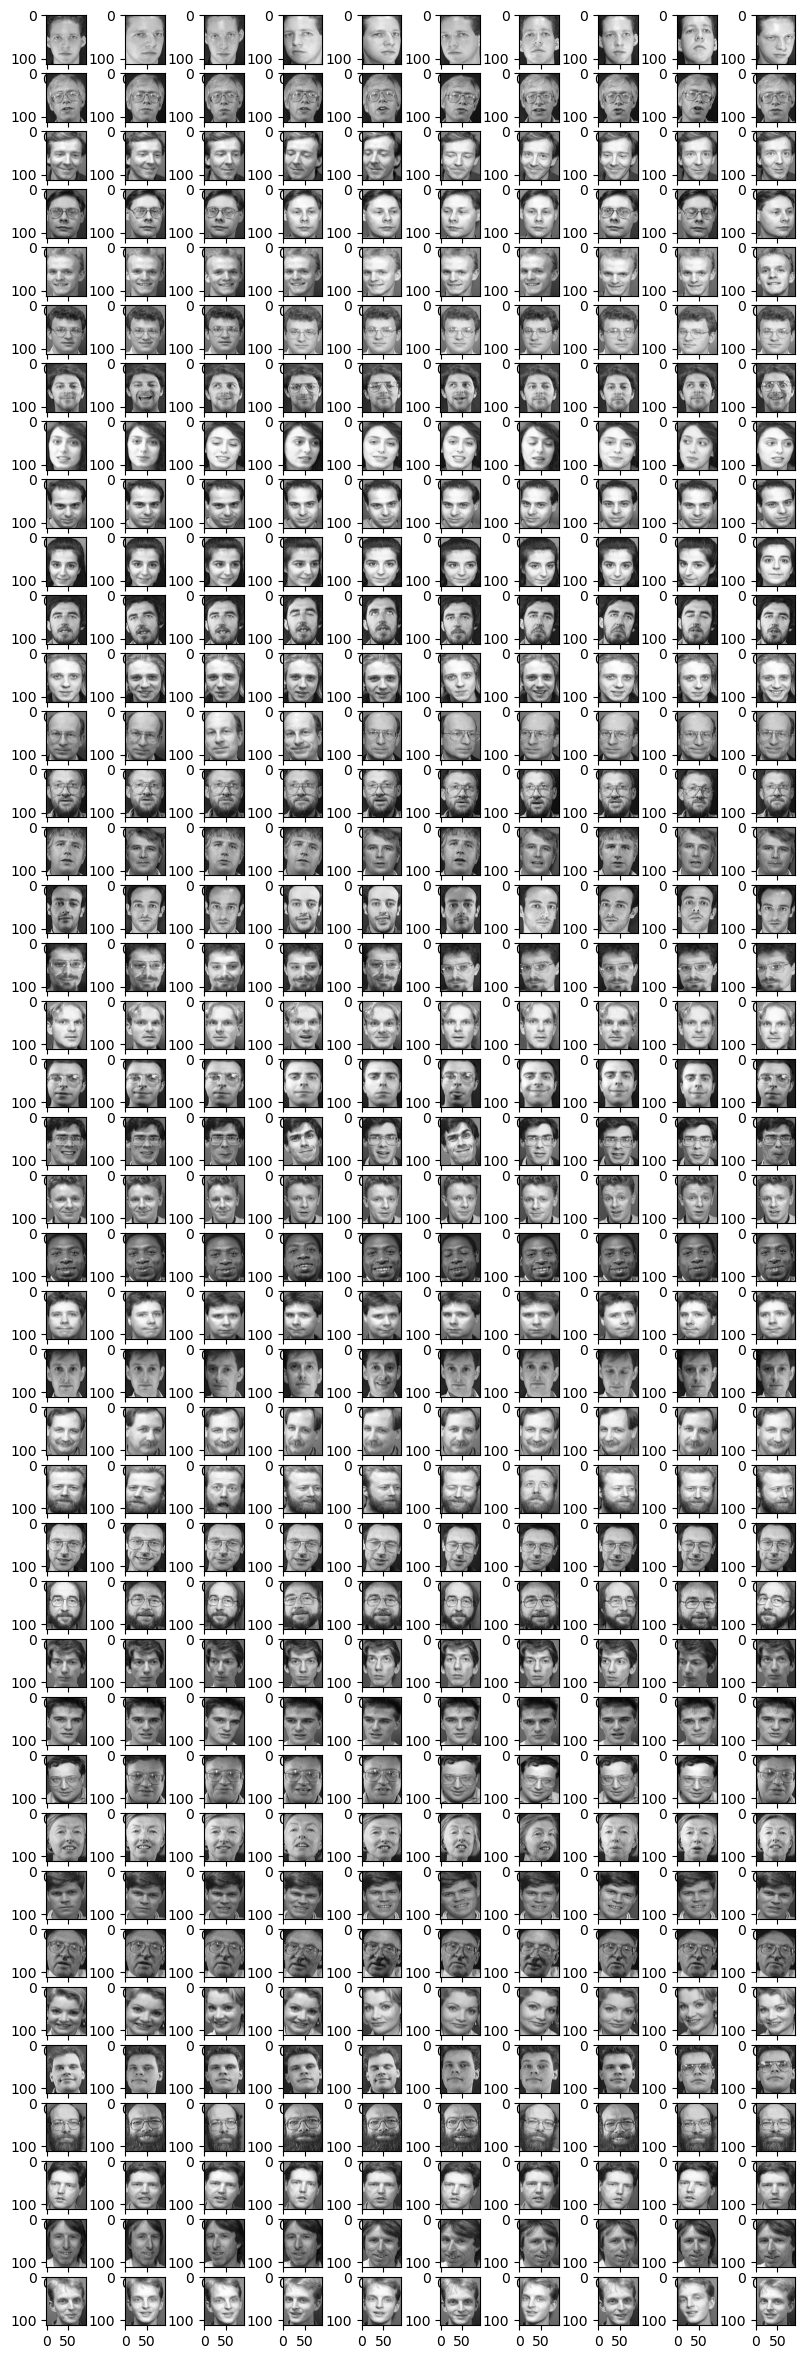

In [7]:
#Plotting the images.
fig, axes = plt.subplots(40, 10, figsize=(10, 30))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(D)[i].reshape(112, 92), cmap='gray')

### Splitting the data into train and test sets
The training set will contain the odd rows,
the test set will contain the even rows.

In [8]:
def data_split(data, label):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for i in range(0, len(data)):
        if (i % 2): #if odd row.
            X_train.append(data[i])
            y_train.append(label[i])
        else :#if even row
            X_test.append(data[i])
            y_test.append(label[i])
    X_train = np.array(X_train)
    X_test =  np.array(X_test)
    y_train = np.array(y_train)
    y_test =  np.array(y_test)
    return X_train, y_train, X_test, y_test

In [9]:
X_train, y_train, X_test, y_test = data_split(D, y)

### Classification using PCA

### Calculating the mean matrix 

In [10]:
mean = X_train.mean(0)

### calculating the center class matrix Z

In [11]:
z = X_train - mean

### calculating the covariance matrix cov

In [12]:
cov = np.cov(z.T, bias=True)

### Calculating the Eigenvalues & Eigenvectors

In [13]:
EVA, EVE = np.linalg.eigh(cov)
idx = EVA.argsort()[::-1]   
EVA = EVA[idx]
EVE = EVE[:,idx]

### Using  firstNearest Neighbor classifier for PCA with different values of alpha

In [38]:
def ClassificationPCA(X_train,y_train,X_test,y_test, k):
    accuracy = np.array([])
    
    #getting  the accuracy for each value of k.
    for i in range(0,len(k)):
        classifier = KNeighborsClassifier(n_neighbors = k[i])
        classifier.fit(X_train,y_train)
        
        #calculating the accuracy.
        accuracy = np.append(accuracy,classifier.score(X_test, y_test))
        
    #plotting the accuracy against the K values.
    df = pd.DataFrame({'k':k, 'accuracy': accuracy})
    sns.barplot(data=df, x="k", y="accuracy")
    sns.despine(left=True);
    plt.figure(figsize=(4,4))
    plt.show()
    plt.figure(figsize=(4,4))
    plt.plot(k,accuracy)
    plt.xlabel('No. K') #x-axis label
    plt.ylabel('Accuracy') #y_axis label
    plt.title('PCA KNN') #fifure title
    plt.show()
    
    #Printing the accuracy
    for i in range(0,len(k)):
        print(f'accuracy at K = {k[i]} : {accuracy[i]} ')

In [15]:
def pca_classification(EVA,EVE,X_train,y_train,X_test,y_test,alpha):
    f = 0
    i = 0
    trace = np.sum(EVA)
    while f <= alpha:
        f = f + EVA[i]/trace
        i=i+1
    U = EVE[:,:i]
    a_train = np.matmul(X_train,U)
    a_test = np.matmul(X_test,U)
    print ("number of dimensions:", U.shape[1])
    k = np.array([1,3, 5, 7])
    ClassificationPCA(a_train,y_train,a_test,y_test,k)

at alpha = 0.8
number of dimensions: 37


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

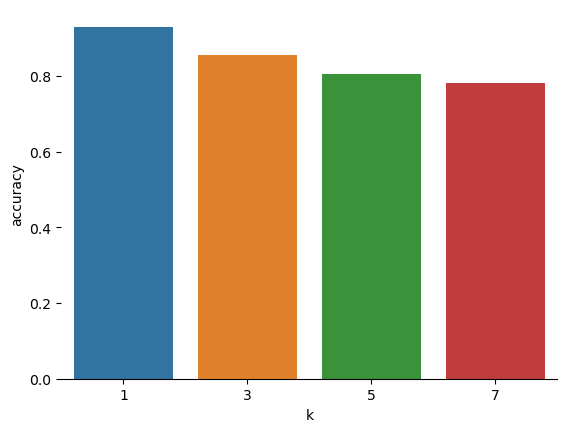

<Figure size 400x400 with 0 Axes>

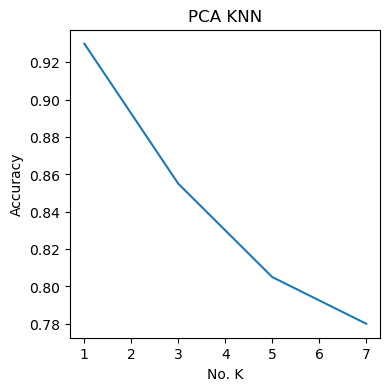

accuracy at K = 1 : 0.93 
accuracy at K = 3 : 0.855 
accuracy at K = 5 : 0.805 
accuracy at K = 7 : 0.78 
-----------------------------------------------------
at alpha = 0.85
number of dimensions: 53


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

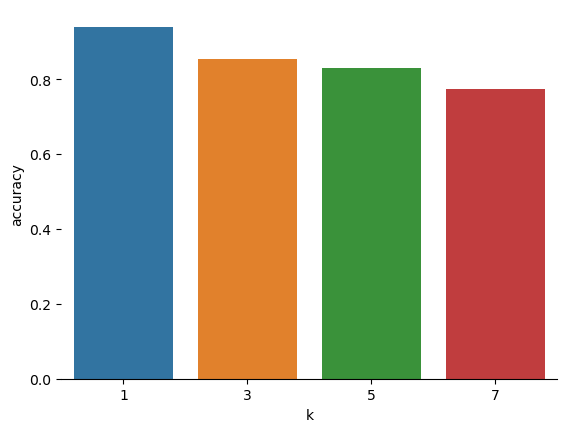

<Figure size 400x400 with 0 Axes>

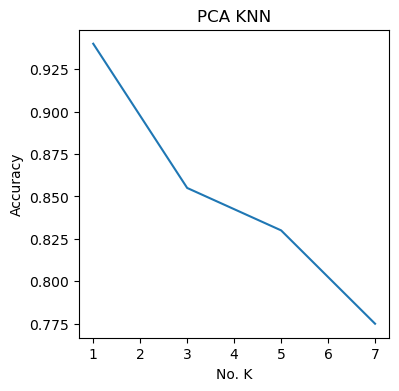

accuracy at K = 1 : 0.94 
accuracy at K = 3 : 0.855 
accuracy at K = 5 : 0.83 
accuracy at K = 7 : 0.775 
-----------------------------------------------------
at alpha = 0.9
number of dimensions: 77


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

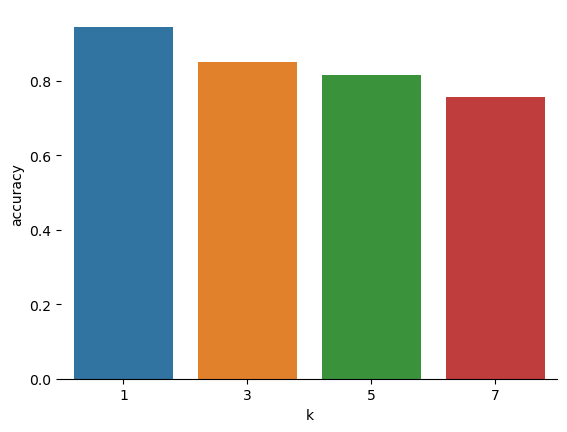

<Figure size 400x400 with 0 Axes>

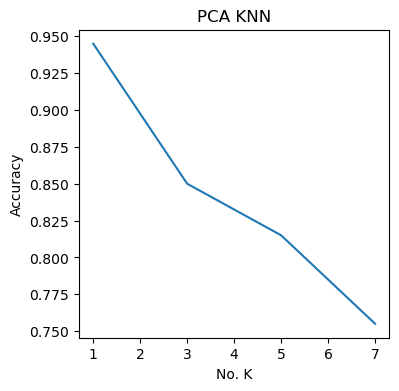

accuracy at K = 1 : 0.945 
accuracy at K = 3 : 0.85 
accuracy at K = 5 : 0.815 
accuracy at K = 7 : 0.755 
-----------------------------------------------------
at alpha = 0.95
number of dimensions: 116


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

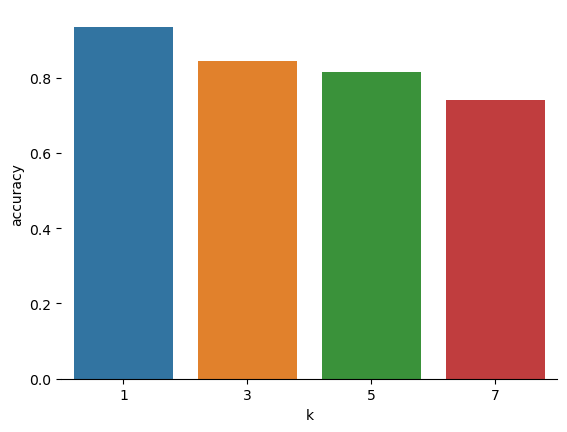

<Figure size 400x400 with 0 Axes>

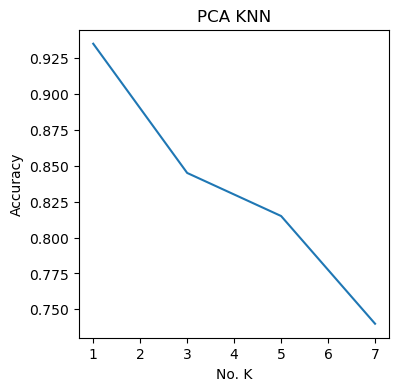

accuracy at K = 1 : 0.935 
accuracy at K = 3 : 0.845 
accuracy at K = 5 : 0.815 
accuracy at K = 7 : 0.74 
-----------------------------------------------------


In [16]:
#Defining different values for alpha.
alpha = [0.8,0.85,0.9,0.95]
for a in alpha:
    print("at alpha =",a)
    pca_classification(EVA,EVE,X_train,y_train,X_test,y_test,a)
    print("-----------------------------------------------------")

### Classification using LDA

#### i- Calculate the mean vector for every class

In [17]:
Mu = []
n = 0
#getting the mean of each class.
for i in range(0,No_classes):
    Mu.append(X_train[n:n+5].mean(0)) #get the first 5 rows each iteration.
    n = n + 5
Mu = np.array(Mu)
total_Mu = X_train.mean(0) #total mean.

#### ii- Calculate B matrix "The between class scatter matrix"

In [18]:
Sb = np.zeros((10304, 10304))
for i in range(0, No_classes):
    mean_diff = (Mu[i] - total_Mu).reshape(10304, 1) 
    Sb += 5 * (mean_diff).dot(mean_diff.T)

### iii- Calculating the S matrix
Where the center class matrix Z = data - mean

In [19]:
S = np.zeros((10304, 10304))
n = 0
for i in range(0,No_classes):
    #Calculating the Center class matrix
    Z = np.array(X_train[n:n+5] - Mu[i]) #get the first 5 rows each iteration.
    S += Z.T.dot(Z)
    n = n + 5

### iiii- Calculating EigenValues & EigenVectors.

In [20]:
#Getting the inverse of S matrix.
S_inv = np.linalg.inv(S)

#Getting the S.inv * Sb 
S_inv_B = S_inv.dot(Sb)

#calculating the eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eigh(S_inv_B)

In [21]:
#Sort from largest to smallest eigenvalues
idx = eig_values.argsort()[::-1] #argsort() --> Returns the indices that would sort an array.
eigen_values = eig_values[idx]
eigen_vectors = eig_vectors[:,idx]

In [22]:
#Getting the 39 dominant eigenvectors.
U = eigen_vectors[:, 0:39].T

###  Project the training set, and test sets

In [23]:
projection_X_train = np.dot(X_train,U.T)
projection_X_test = np.dot(X_test,U.T)

In [24]:
projection_X_train.shape

(200, 39)

### Using  firstNearest Neighbor classifier for LDA

In [41]:
def ClassificationLDA(X_train,y_train,X_test,y_test, k):
    accuracy = np.array([])
    for i in range(0,len(k)):
        classifier = KNeighborsClassifier(n_neighbors = k[i])
        classifier.fit(X_train,y_train)
        
        #calculating the accuracy.
        accuracy = np.append(accuracy,classifier.score(X_test, y_test))
        
    #plotting the accuracy against the K values.
    df = pd.DataFrame({'k':k, 'accuracy': accuracy})
    sns.barplot(data=df, x="k", y="accuracy")
    sns.despine(left=True);
    plt.figure(figsize=(4,4))
    plt.show()
    plt.figure(figsize=(4,4))
    plt.plot(k,accuracy)
    plt.xlabel('No. K') #x-axis label
    plt.ylabel('Accuracy') #y_axis label
    plt.title('LDA KNN') #fifure title
    plt.show()
    
    #Printing the accuracy
    for i in range(0,len(k)):
        print(f'accuracy at K = {k[i]} : {accuracy[i]} ')

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

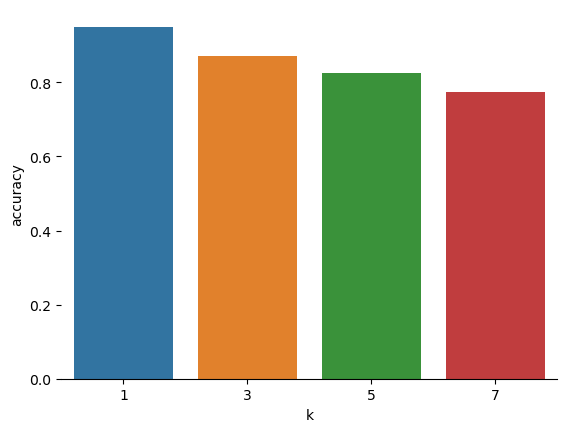

<Figure size 400x400 with 0 Axes>

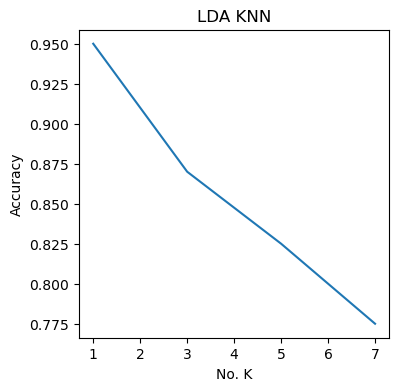

accuracy at K = 1 : 0.95 
accuracy at K = 3 : 0.87 
accuracy at K = 5 : 0.825 
accuracy at K = 7 : 0.775 


In [26]:
k = np.array([1,3,5,7])
ClassificationLDA(projection_X_train, y_train, projection_X_test, y_test, k)

### Compare vs Non-Face Images 

In [10]:
# set the directory path of the images
dir_path = r'D:\Records\Term 8\Pattern Recognittion\assignment1'

# initialize an empty list to store the flattened image arrays
D1 = []

# loop through all the images in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.pgm'):
        
        # open the image file
        image = Image.open(os.path.join(dir_path, filename))
        
        # resize the image to (92, 112)
        image = image.resize((92, 112))
        
        # convert the image to grayscale
        image = image.convert('L')
        
        # convert the image to a NumPy array and flatten it
        image_array = np.array(image).flatten()
        
        # add the flattened image array to the list
        D1.append(image_array)
        
# convert the list of flattened image arrays to a NumPy array
D1 = np.array(D1)

# print the shape of the resulting array
print(D1.shape)

(200, 10304)


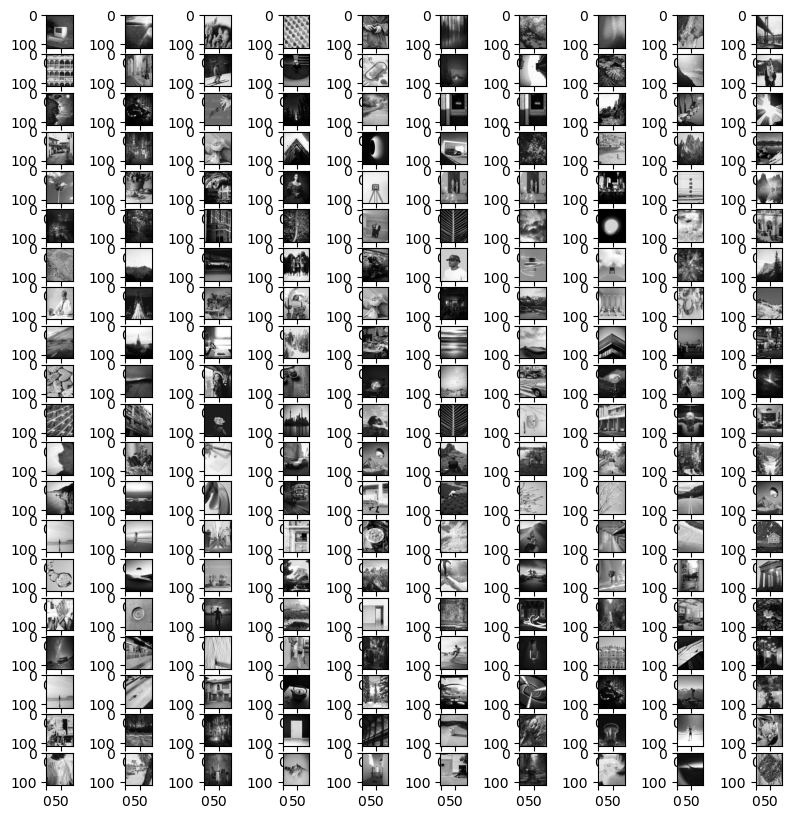

In [11]:
#Plotting the images.
fig, axes = plt.subplots(20, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(D1)[i].reshape(112, 92), cmap='gray')

In [12]:
#get the label for each class  for non face and 1 for face images.
y_nf = np.empty(0)
for i in range (0,200):
    y_nf = np.append(y_nf,1)
for i in range (0,200):
    y_nf = np.append(y_nf,0)

In [13]:
#Defining the new data faces vs non faces.
#200 faces and 100 non faces.
f_nf_data_300 = np.vstack((X_train, D1[0:100])) 
y_nf_300 = y_nf[0:300]

#200 faces and 200 non faces.
f_nf_data_400 = np.vstack((X_train,D1))

### Splitting the data into train and test sets.

In [14]:
#splitting for 200 faces vs 100 non faces.
X_nf_train_300, y_nf_train_300, X_nf_test_300, y_nf_test_300 = data_split(f_nf_data_300, y_nf_300)

#splitting for 200 faces vs 200 non faces.
X_nf_train_400, y_nf_train_400, X_nf_test_400, y_nf_test_400 = data_split(f_nf_data_400, y_nf)

### classify using PCA

#### For 200 faces vs 100 non faces 

In [21]:
#Calculating the mean matrix
mean_nf_300 = X_nf_train_300.mean(0)

#calculating the center class matrix Z
z_nf_300 = X_nf_train_300 - mean_nf_300

#calculating the covariance matrix cov
cov_nf_300 = np.cov(z_nf_300.T, bias=True)

#Calculating the Eigenvalues & Eigenvectors
EVA_nf_300, EVE_nf_300 = np.linalg.eigh(cov_nf_300)
idx_nf_300 = EVA_nf_300.argsort()[::-1]   
EVA_nf_300 = EVA_nf_300[idx_nf_300]
EVE_nf_300 = EVE_nf_300[:,idx_nf_300]

at alpha = 0.8
number of dimensions: 17


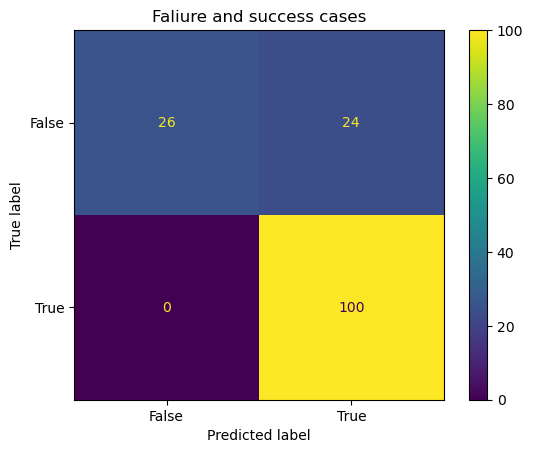

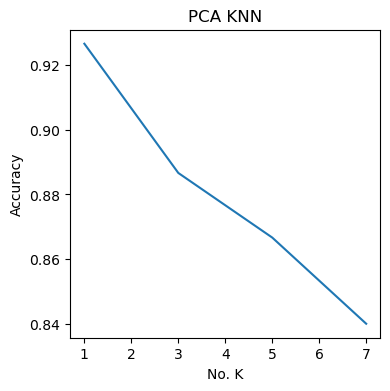

accuracy at K = 1 : 0.9266666666666666 
accuracy at K = 3 : 0.8866666666666667 
accuracy at K = 5 : 0.8666666666666667 
accuracy at K = 7 : 0.84 
-----------------------------------------------------
at alpha = 0.85
number of dimensions: 27


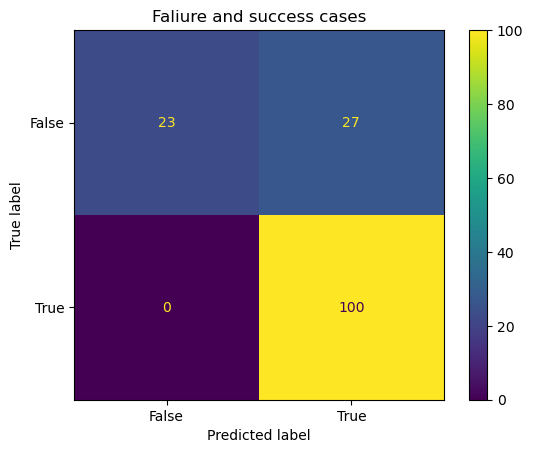

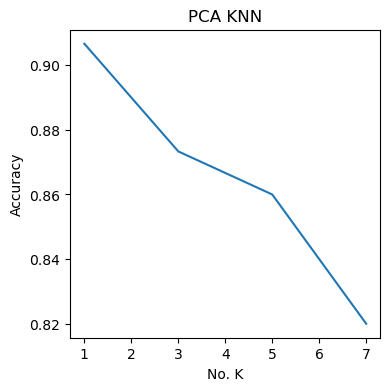

accuracy at K = 1 : 0.9066666666666666 
accuracy at K = 3 : 0.8733333333333333 
accuracy at K = 5 : 0.86 
accuracy at K = 7 : 0.82 
-----------------------------------------------------
at alpha = 0.9
number of dimensions: 43


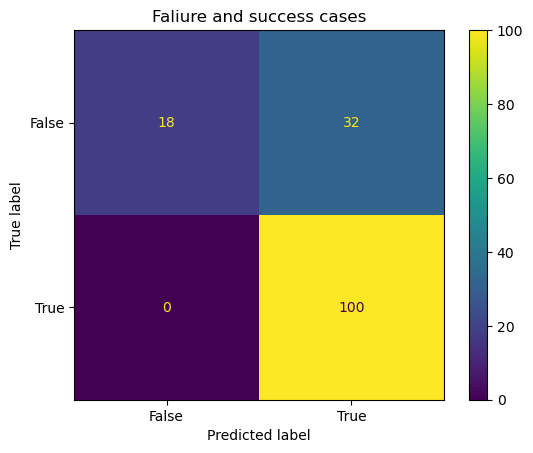

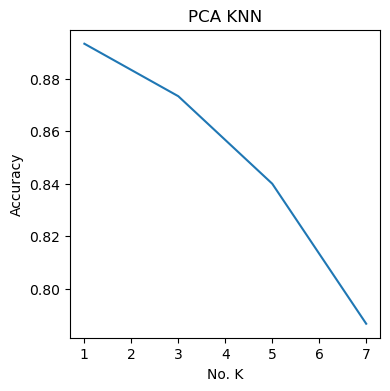

accuracy at K = 1 : 0.8933333333333333 
accuracy at K = 3 : 0.8733333333333333 
accuracy at K = 5 : 0.84 
accuracy at K = 7 : 0.7866666666666666 
-----------------------------------------------------
at alpha = 0.95
number of dimensions: 72


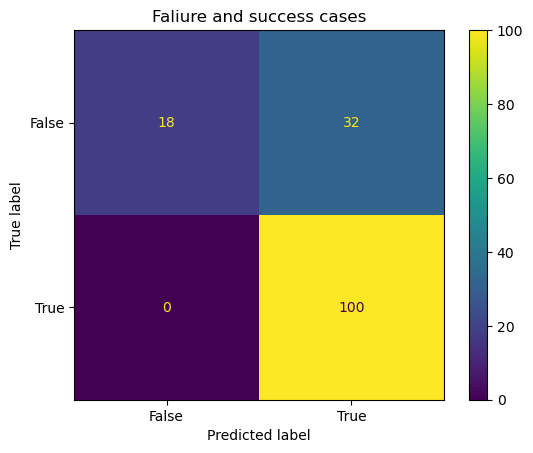

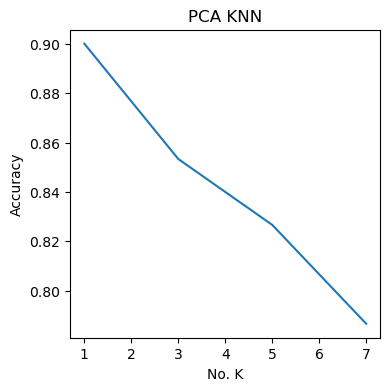

accuracy at K = 1 : 0.9 
accuracy at K = 3 : 0.8533333333333334 
accuracy at K = 5 : 0.8266666666666667 
accuracy at K = 7 : 0.7866666666666666 
-----------------------------------------------------


In [31]:
def ClassificationPCA_nf(X_train,y_train,X_test,y_test, k):
    accuracy = np.array([])
    predicted = np.array([])
    
    #getting the accuracy for each value of k
    for i in range(0,len(k)):
        classifier = KNeighborsClassifier(n_neighbors = k[i])
        classifier.fit(X_train,y_train)
        predicted = classifier.predict(X_test)
        
        #calculating the accuracy.
        accuracy = np.append(accuracy, classifier.score(X_test, y_test))
    
    #calculating the confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.title('Faliure and success cases') #figure title
    plt.show()
    
    #plotting the accuracy against the K values.
    plt.figure(figsize=(4,4))
    plt.plot(k,accuracy)
    plt.xlabel('No. K') #x-axis label
    plt.ylabel('Accuracy') #y_axis label
    plt.title('PCA KNN') #figure title
    plt.show()

    
    #Printing the accuracy
    for i in range(0,len(k)):
        print(f'accuracy at K = {k[i]} : {accuracy[i]} ')
        
def pca_classification_nf(EVA,EVE,X_train,y_train,X_test,y_test,alpha):
    f = 0
    i = 0
    trace = np.sum(EVA)
    while f <= alpha:
        f = f + EVA[i]/trace
        i=i+1
    U = EVE[:,:i]
    a_train = np.matmul(X_train,U)
    a_test = np.matmul(X_test,U)
    print ("number of dimensions:", U.shape[1])
    k = np.array([1,3, 5, 7])
    ClassificationPCA_nf(a_train,y_train,a_test,y_test,k)
    
for a in alpha:
    print("at alpha =",a)
    pca_classification_nf(EVA_nf_300,EVE_nf_300,X_nf_train_300,y_nf_train_300,X_nf_test_300,y_nf_test_300,a)
    print("-----------------------------------------------------")

#### For 200 faces vs 200 non faces

In [34]:
#Calculating the mean matrix
mean_nf_400 = X_nf_train_400.mean(0)

#calculating the center class matrix Z
z_nf_400 = X_nf_train_400 - mean_nf_400

#calculating the covariance matrix cov
cov_nf_400 = np.cov(z_nf_400.T, bias=True)

#Calculating the Eigenvalues & Eigenvectors
EVA_nf_400, EVE_nf_400 = np.linalg.eigh(cov_nf_400)
idx_nf_400 = EVA_nf_400.argsort()[::-1]   
EVA_nf_400 = EVA_nf_400[idx_nf_400]
EVE_nf_400 = EVE_nf_400[:,idx_nf_400]

at alpha = 0.8
number of dimensions: 19


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

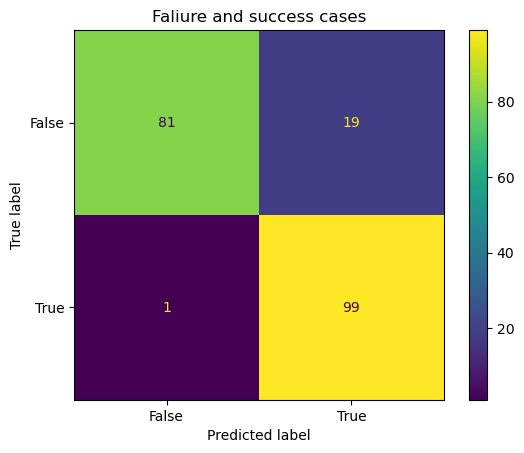

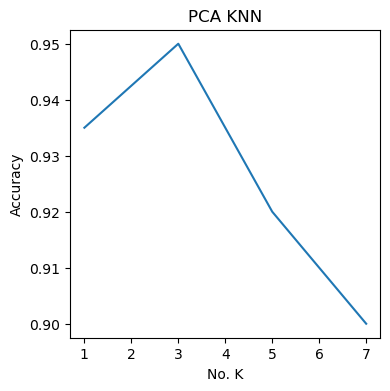

accuracy at K = 1 : 0.935 
accuracy at K = 3 : 0.95 
accuracy at K = 5 : 0.92 
accuracy at K = 7 : 0.9 
-----------------------------------------------------
at alpha = 0.85
number of dimensions: 30


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

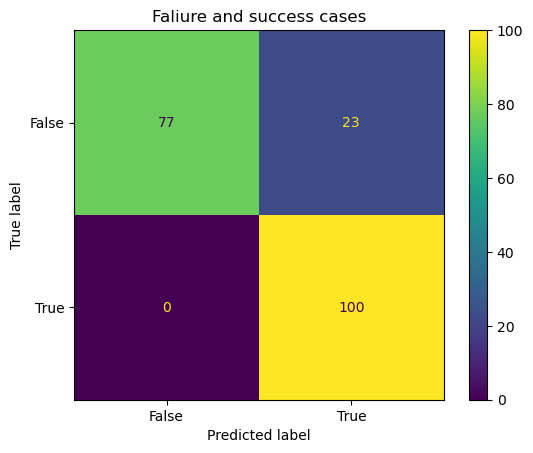

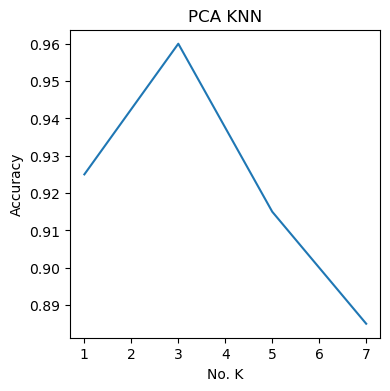

accuracy at K = 1 : 0.925 
accuracy at K = 3 : 0.96 
accuracy at K = 5 : 0.915 
accuracy at K = 7 : 0.885 
-----------------------------------------------------
at alpha = 0.9
number of dimensions: 50


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

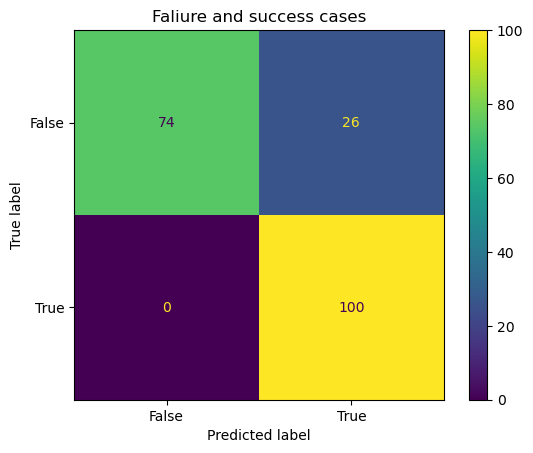

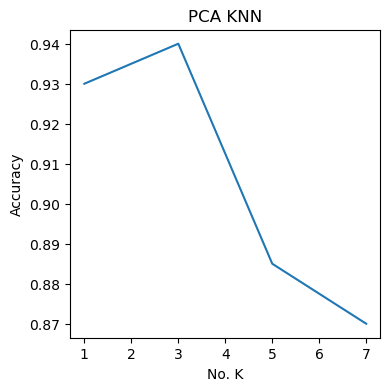

accuracy at K = 1 : 0.93 
accuracy at K = 3 : 0.94 
accuracy at K = 5 : 0.885 
accuracy at K = 7 : 0.87 
-----------------------------------------------------
at alpha = 0.95
number of dimensions: 88


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

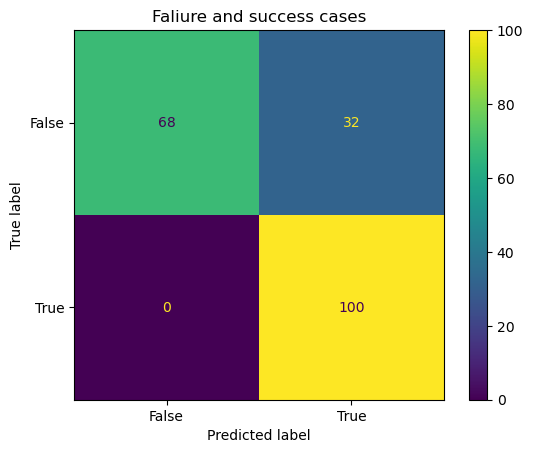

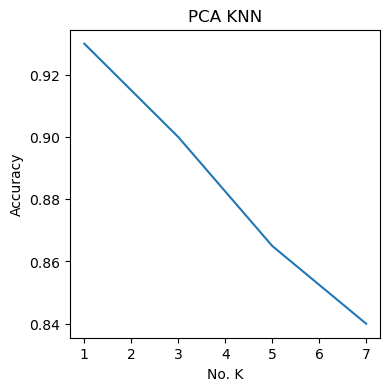

accuracy at K = 1 : 0.93 
accuracy at K = 3 : 0.9 
accuracy at K = 5 : 0.865 
accuracy at K = 7 : 0.84 
-----------------------------------------------------


In [35]:
for a in alpha:
    print("at alpha =",a)
    pca_classification_nf(EVA_nf_400,EVE_nf_400,X_nf_train_400,y_nf_train_400,X_nf_test_400,y_nf_test_400,a)
    print("-----------------------------------------------------")

### Classify using LDA

#### For 200 faces vs 100 non faces

In [15]:
#getting the mean
Mu_300 = []
n = 0
#getting the mean of each class.
for i in range(0,2):
    Mu_300.append(X_nf_train_300[n:n + 100].mean(0))
    n = n + 100
Mu_300 = np.array(Mu_300)
total_Mu_300 = X_nf_train_300.mean(0) #total mean.

#The between class scatter matrix
Sb_300 = np.zeros((10304, 10304))
Nk = [100, 50] #for the 
for i in range(0, 2):
    mean_diff = (Mu_300[i] - total_Mu_300).reshape(10304, 1) 
    Sb_300 += Nk[i] * (mean_diff).dot(mean_diff.T)

#getting the s matrix
S_300 = np.zeros((10304, 10304))
n = 0
for i in range(0, 2):
    #Calculating the Center class matrix
    Z_300 = np.array(X_nf_train_300[n:n + 100] - Mu_300[i]) #get the first 5 rows each iteration.
    S_300 += Z_300.T.dot(Z_300)
    n = n + 100
    
#Calculating EigenValues & EigenVectors.
#Getting the inverse of S matrix.
S_inv_300 = np.linalg.inv(S_300)

#Getting the S.inv * Sb 
S_inv_B_300 = S_inv_300.dot(Sb_300)

#calculating the eigenvalues and eigenvectors
eig_values_300, eig_vectors_300 = np.linalg.eigh(S_inv_B_300)

#Sort from largest to smallest eigenvalues
idx_300 = eig_values_300.argsort()[::-1] #argsort() --> Returns the indices that would sort an array.
eigen_values_300 = eig_values_300[idx_300]
eigen_vectors_300 = eig_vectors_300[:,idx_300]

#Getting the 39 dominant eigenvectors.
U_300 = eigen_vectors_300[:, 0:2].T

#Project the training set, and test sets
projection_X_nf_train_300 = np.dot(X_nf_train_300, U_300.T)
projection_X_nf_test_300 = np.dot(X_nf_test_300, U_300.T)

In [16]:
def ClassificationLDA_nf(X_train,y_train,X_test,y_test, k):
    accuracy = np.array([])
    predicted = np.array([])
    for i in range(0,len(k)):
        classifier = KNeighborsClassifier(n_neighbors = k[i])
        classifier.fit(X_train,y_train)
        predicted = classifier.predict(X_test)
        
        #calculating the accuracy.
        accuracy = np.append(accuracy,classifier.score(X_test, y_test))
        
    #calculating the confusion matrix
    conf_matrix = metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.title('Faliure and success cases') #figure title
    plt.show()
    
    #plotting the accuracy against the K values.
    plt.figure(figsize=(4,4))
    plt.plot(k,accuracy)
    plt.xlabel('No. K') #x-axis label
    plt.ylabel('Accuracy') #y_axis label
    plt.title('LDA KNN') #figure title
    plt.show()
    
    #Printing the accuracy
    for i in range(0,len(k)):
        print(f'accuracy at K = {k[i]} : {accuracy[i]} ')

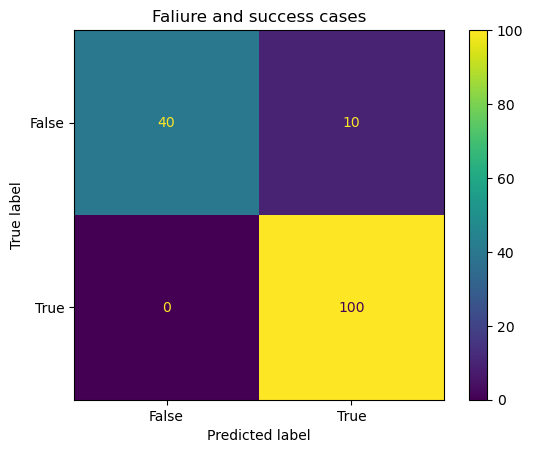

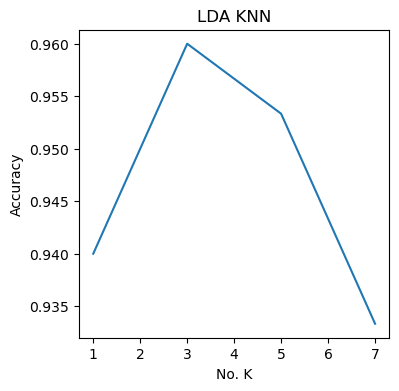

accuracy at K = 1 : 0.94 
accuracy at K = 3 : 0.96 
accuracy at K = 5 : 0.9533333333333334 
accuracy at K = 7 : 0.9333333333333333 


In [52]:
ClassificationLDA_nf(projection_X_nf_train_300, y_nf_train_300, projection_X_nf_test_300, y_nf_test_300, k)

#### For 200 faces vs 200 non faces

In [19]:
k = [1, 3, 5, 7]

In [17]:
#getting the mean
Mu_400 = []
n = 0
#getting the mean of each class.
for i in range(0,2):
    Mu_400.append(X_nf_train_400[n:n + 100].mean(0)) 
    n = n + 100
Mu_400 = np.array(Mu_400)
total_Mu_400 = X_nf_train_400.mean(0) #total mean.

#The between class scatter matrix
Sb_400 = np.zeros((10304, 10304))
for i in range(0, 2):
    mean_diff = (Mu_400[i] - total_Mu_400).reshape(10304, 1) 
    Sb_400 += 100 * (mean_diff).dot(mean_diff.T)

#getting the s matrix
S_400 = np.zeros((10304, 10304))
n = 0
for i in range(0, 2):
    #Calculating the Center class matrix
    Z_400 = np.array(X_nf_train_400[n:n + 100] - Mu_400[i]) #get the first 5 rows each iteration.
    S_400 += Z_400.T.dot(Z_400)
    n = n + 100
    
#Calculating EigenValues & EigenVectors.
#Getting the inverse of S matrix.
S_inv_400 = np.linalg.inv(S_400)

#Getting the S.inv * Sb 
S_inv_B_400 = S_inv_400.dot(Sb_400)

#calculating the eigenvalues and eigenvectors
eig_values_400, eig_vectors_400 = np.linalg.eigh(S_inv_B_400)

#Sort from largest to smallest eigenvalues
idx_400 = eig_values_400.argsort()[::-1] #argsort() --> Returns the indices that would sort an array.
eigen_values_400 = eig_values_400[idx_400]
eigen_vectors_400 = eig_vectors_400[:,idx_400]

#Getting the 39 dominant eigenvectors.
U_400 = eigen_vectors_400[:, 0:46].T

#Project the training set, and test sets
projection_X_nf_train_400 = np.dot(X_nf_train_400, U_400.T)
projection_X_nf_test_400 = np.dot(X_nf_test_400, U_400.T)

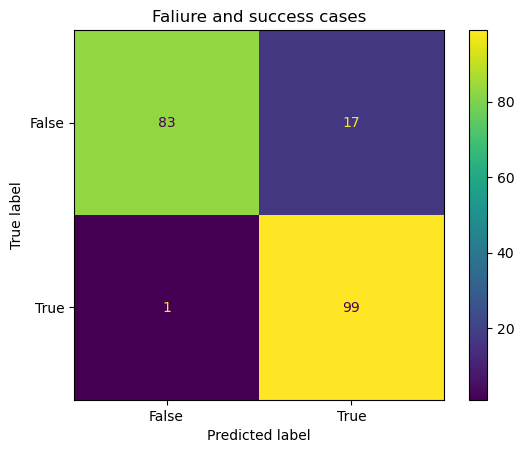

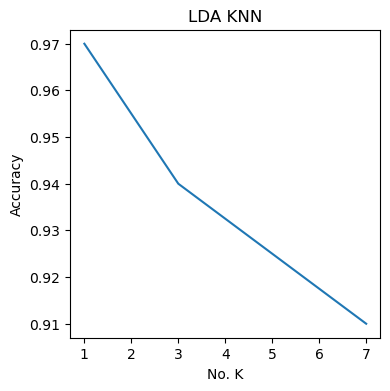

accuracy at K = 1 : 0.97 
accuracy at K = 3 : 0.94 
accuracy at K = 5 : 0.925 
accuracy at K = 7 : 0.91 


In [54]:
ClassificationLDA_nf(projection_X_nf_train_400, y_nf_train_400, projection_X_nf_test_400, y_nf_test_400, k)

### Different splitting.

Split the data into 70% training set, and 30% test set.

In [30]:
def data_split(data, label):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    counter =0
    #X_train, X_test, y_train, y_test = train_test_split(data,label , random_state=104, train_size=0.7, shuffle=True) another possible way that can be used when doing a binary classification 
    for i in range(0, len(data)):
        if counter < 7:#the first 7 faces per subject
            X_train.append(data[i])
            y_train.append(label[i])
        else :#the last three faces per subject
            X_test.append(data[i])
            y_test.append(label[i])
        if counter < 9:
            counter = counter + 1
        else:
            counter=0
    X_train = np.array(X_train)
    X_test =  np.array(X_test)
    y_train = np.array(y_train)
    y_test =  np.array(y_test)
    return X_train, y_train, X_test, y_test

### Using built-in functions

In [39]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

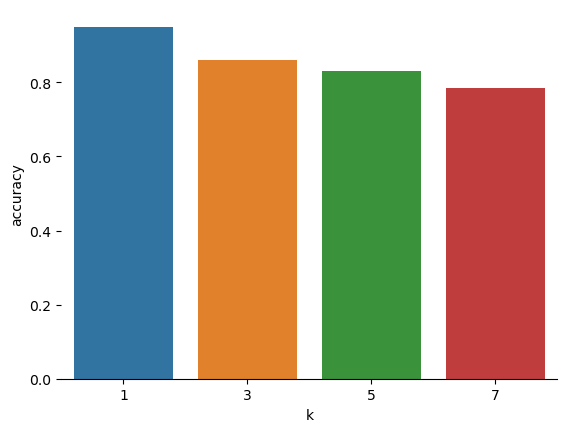

<Figure size 400x400 with 0 Axes>

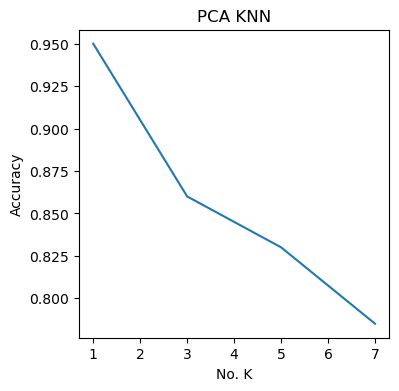

accuracy at K = 1 : 0.95 
accuracy at K = 3 : 0.86 
accuracy at K = 5 : 0.83 
accuracy at K = 7 : 0.785 


In [40]:
pca = PCA(n_components=100)
pca.fit(X_train)
pca.fit(X_test)
X=pca.transform(X_train)
Xt = pca.transform(X_test)
k = [1, 3, 5, 7]
ClassificationPCA(X, y_train, Xt, y_test, k)

In [42]:
lda = LDA(n_components=30)
Xlda  = lda.fit_transform(X_train, y_train)
Xtlda = lda.transform(X_test)

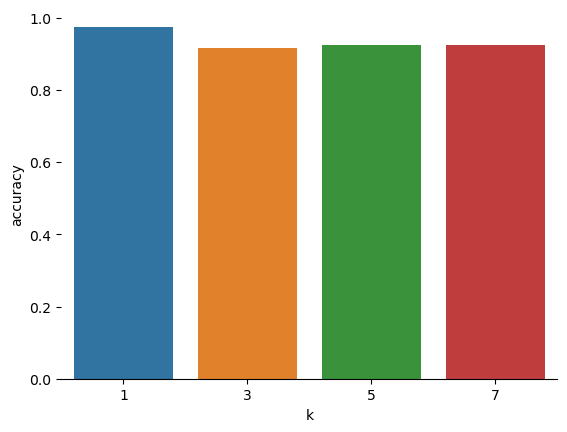

<Figure size 400x400 with 0 Axes>

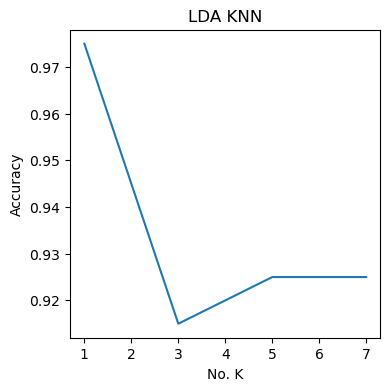

accuracy at K = 1 : 0.975 
accuracy at K = 3 : 0.915 
accuracy at K = 5 : 0.925 
accuracy at K = 7 : 0.925 


In [43]:
ClassificationLDA(Xlda, y_train, Xtlda, y_test, k)